In [1]:
#импортируем библиотеки
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/3_user_data.csv')
logs = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/3_logs.csv')

In [3]:
# смотрим описательные статистики данных
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
user_data.shape

(2954, 3)

In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
logs.shape

(4500, 4)

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Сколько уникальных значений принимает переменная platform?

In [12]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [13]:
success_operations_by_client = logs.query('success == True') \
                             .groupby('client').count() \
                             .success
max_success_operations = success_operations_by_client.max()

In [14]:
list(success_operations_by_client.loc[success_operations_by_client == max_success_operations].index.sort_values())

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [15]:
logs.query('success == True')\
    .groupby('platform').count().client.idxmax()

'phone'

Какая платформа наиболее популярна среди премиумных клиентов?

In [16]:
full_table = logs.merge(user_data, how='inner', on='client')

In [17]:
full_table.query('premium == True').groupby('platform').client.count().idxmax()

'phone'

Визуализация распределения возраста клиентов в зависимости от типа клиента (обычный или премиум)

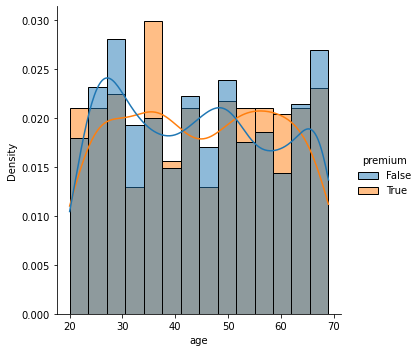

In [18]:
sns.displot(data=full_table, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=14)
# common_norm - нормировка для hue по выполняется по отдельности

График распределения числа успешных операций

<AxesSubplot:xlabel='success', ylabel='Count'>

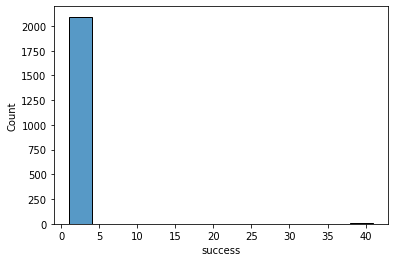

In [19]:
sns.histplot(data=full_table.query('success == True').groupby('client').count(), x='success')

<AxesSubplot:xlabel='success', ylabel='count'>

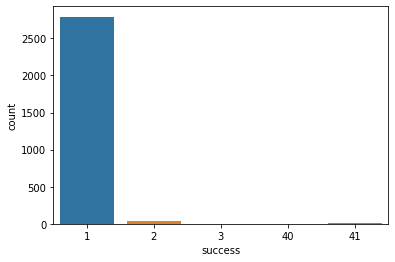

In [20]:
#второй вариант графика
sns.countplot(x=success_operations_by_client)

Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='count'>

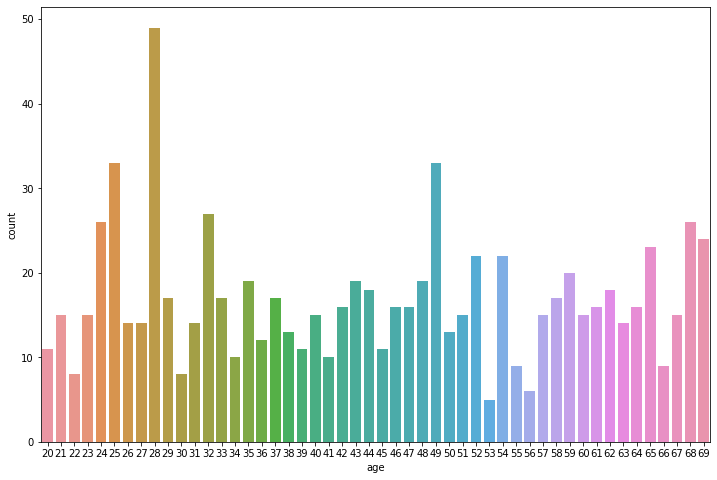

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=full_table.query(' platform == "computer" and success == True '), x='age')